In [61]:
import os
import numpy as np
import pickle
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

params = {'kernel_type': 'linear',
          'test_size': 0.15,
          'subsample_size': 40000,
          'pca' : False,
          'random_state': 123}

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [62]:
#--FASHION SCATTER FUNCTION
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", 16))

    # create a scatter plot.
    f = plt.figure(figsize=(20, 20))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="b"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [63]:
#-- MAKE INPUTS AND OUTPUTS

nominal_converter = {'class': {"present" : 1, "absent" : 0}}

# read dataset and replace nominal with numerical data
df = pd.read_csv('BNG_heart-statlog.csv')
#convert nominal to numerical
df.replace(nominal_converter, inplace = True)


# nov 26th
# split into inputs and outputs
features = df.iloc[:params['subsample_size'], :-1]
labels = df['class'][:params['subsample_size']]

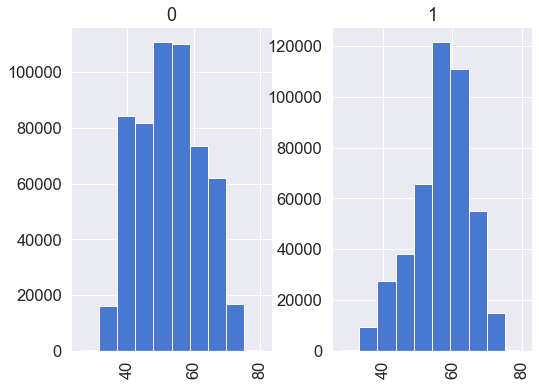

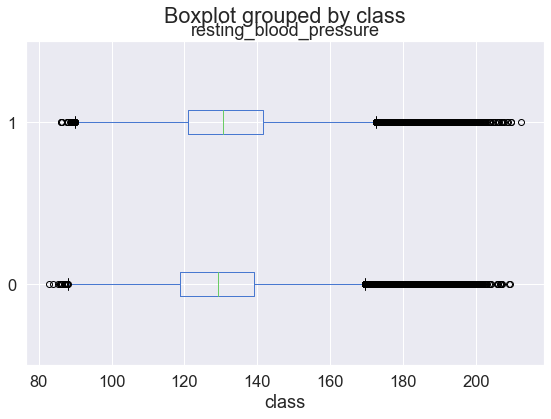

In [64]:
#-- HISTOGRAMS AND PLOTS

fig = plt.figure(figsize = (8,6))
plt.title('Age of patients grouped by class')
df.hist(ax=fig.gca(),  column="age", by="class")
plt.show()

fig = plt.figure(figsize = (9,6))
plt.title('Resting blood pressure of patients grouped by class')
df.boxplot(ax=fig.gca(),column="resting_blood_pressure", by="class", vert=False)
plt.show()

In [65]:
'''from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne_file = 'tsne_' + str(subsection) + '.pickle'

if (not os.path.exists(tsne_file)):
    print('Creating TSNE File')
    tSNE = TSNE(random_state=123).fit_transform(features)
    
    with open(tsne_file, 'wb+') as output_file:
        pickle.dump(tSNE, output_file)
else:
    print('Loading from TSNE File')
    with open(tsne_file, 'rb') as input_file:
        tSNE = pickle.load(input_file)
        
print ('Time elapsed: {} seconds'.format(time.time()-time_start))

fashion_scatter(tSNE, np.multiply(np.array(labels), 4))'''

"from sklearn.manifold import TSNE\nimport time\n\ntime_start = time.time()\ntsne_file = 'tsne_' + str(subsection) + '.pickle'\n\nif (not os.path.exists(tsne_file)):\n    print('Creating TSNE File')\n    tSNE = TSNE(random_state=123).fit_transform(features)\n    \n    with open(tsne_file, 'wb+') as output_file:\n        pickle.dump(tSNE, output_file)\nelse:\n    print('Loading from TSNE File')\n    with open(tsne_file, 'rb') as input_file:\n        tSNE = pickle.load(input_file)\n        \nprint ('Time elapsed: {} seconds'.format(time.time()-time_start))\n\nfashion_scatter(tSNE, np.multiply(np.array(labels), 4))"

pca shape (40000, 13)
PCA done! Time elapsed: 0.05282330513000488 seconds
[7.40704894e-01 1.49204292e-01 8.74401573e-02 2.03033413e-02
 1.04534628e-03 3.81479896e-04 2.71423033e-04 2.37000369e-04
 2.04771651e-04 7.19302356e-05 5.13049594e-05 4.89436846e-05
 3.51151984e-05]


Text(0, 0.5, 'Second Principal Component')

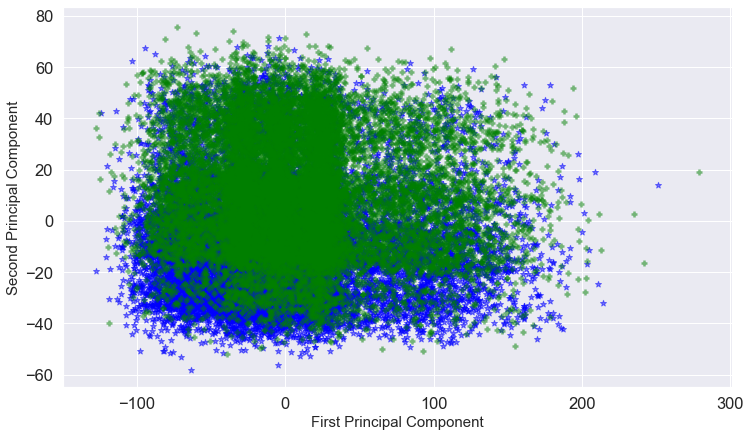

In [66]:
#-- PCA
time_start = time.time()
pca = PCA(n_components=13)
pca_intermediate = pca.fit(features)
pca_result = pca_intermediate.transform(features)
print('pca shape', pca_result.shape)
print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))


pca_df = pd.DataFrame(columns = ['pc1', 'pc2'])
pca_df['pc1'] = pca_result[:, 0]
pca_df['pc2'] = pca_result[:, 1]
pca_df['pc3'] = pca_result[:, 2]
pca_df['pc4'] = pca_result[:, 3]
print(pca.explained_variance_ratio_)

colordict = {0:'blue', 1:'green'}
piclabel = {0:'Absent', 1:'Present'}
markers = {0:'*', 1:'+'}
alphas = {0:0.5, 1:0.5}

fig = plt.figure(figsize=(12, 7))
plt.subplot(1,1,1)
for l in np.unique(labels):
    ix = np.where(labels==l)[0]
    plt.scatter(pca_df['pc1'][ix], pca_df['pc2'][ix], c=colordict[l],
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
    
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)

In [67]:
'''# apply tSNE to the Principal Components
time_start = time.time()
pca_tSNE = TSNE(random_state=123).fit_transform(pca_result)
print ('Time elapsed: {} seconds'.format(time.time()-time_start))

fashion_scatter(pca_tSNE, np.multiply(np.array(labels), 4))'''

"# apply tSNE to the Principal Components\ntime_start = time.time()\npca_tSNE = TSNE(random_state=123).fit_transform(pca_result)\nprint ('Time elapsed: {} seconds'.format(time.time()-time_start))\n\nfashion_scatter(pca_tSNE, np.multiply(np.array(labels), 4))"

In [68]:
#-- TRAIN-VAL SPLIT

if params['pca']:
    train_features, test_features, train_labels, test_labels = train_test_split(pca_df[['pc1', 'pc2']].values,
                                                                                labels,
                                                                                test_size=params['test_size'],
                                                                                random_state=params['random_state'])

else:
    train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                                labels,
                                                                                test_size=params['test_size'],
                                                                                random_state=params['random_state'])


model_file = 'svm_model_' + str(params['subsample_size']) + \
    '_pca' if params['pca'] else '_no_pca' + \
    '.pickle'


In [ ]:
#-- MODEL AND CONFUSION MATRIX

time_start = time.time()

# make model if not exists, load if does
if (not os.path.exists(model_file)):
    print('Creating Model')
    model = svm.SVC(kernel=params['kernel_type'])

    model.fit(train_features, train_labels)

    with open(model_file, 'wb+') as output_file:
        pickle.dump(model, output_file)
else:
    print('Loading Model from File')
    with open(model_file, 'rb') as input_file:
        model = pickle.load(input_file)

print ('Fitting done, time: {} seconds'.format(time.time() - time_start))

predictions = model.predict(test_features)

print("Accuracy:", metrics.accuracy_score(test_labels, predictions))
print("Precision:", metrics.precision_score(test_labels, predictions))
print("Recall:", metrics.recall_score(test_labels, predictions))

confusion_mat = confusion_matrix(test_labels, predictions)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            linewidths=.5,
            xticklabels=["Absent", "Present"],
            yticklabels=["Absent", "Present"],
            ax=ax)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [99]:
#-- PIPELINE

details = "Sample size {}, not only is rbf more robust than sigmoid, we can also see that it is much faster in computing".format(len(train_labels + test_labels))
print(details,'\n', params)

time_start = time.time()

model_1 = svm.SVC(gamma="scale")
pipe_steps = [('SVM', model_1)]

pipeline = Pipeline(pipe_steps, verbose=True)

search_space = {'kernel': ['rbf'],
                'C':[10, 15, 20, 80, 85, 90, 95, 100],
                'max_iter' : [7500]#, 10000]
               }

cross_val_grid = GridSearchCV(model_1, search_space, cv=4)
cross_val_grid.fit(train_features, train_labels)
cv_results = pd.DataFrame(cross_val_grid.cv_results_)

print('DONE pipeline training! took {} seconds'.format(time.time() - time_start))

Sample size 40000, we can see rbf is the only one that maintains consistency after 4 fold validation. So we keep rbf and add sigmoid, for fun 
 {'kernel_type': 'linear', 'test_size': 0.15, 'subsample_size': 40000, 'pca': False, 'random_state': 123}
DONE pipeline training! took 252.0219326019287 seconds


In [100]:
ranked = cv_results.sort_values(['rank_test_score'])
display(ranked.iloc[:5, np.r_[0:3, 7:ranked.shape[1]]])
display(ranked.iloc[-5:, np.r_[0:3, 7:ranked.shape[1]]])

,mean_fit_time,std_fit_time,mean_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,17.462535,0.248856,3.181271,"{'C': 90, 'kernel': 'rbf', 'max_iter': 7500}",0.878955,0.873059,0.880000,0.878809,0.877706,0.002722,1
1,28.209602,0.762241,7.090637,"{'C': 90, 'kernel': 'sigmoid', 'max_iter': 7500}",0.547347,0.546000,0.546588,0.538887,0.544706,0.003393,2
